/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:88: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


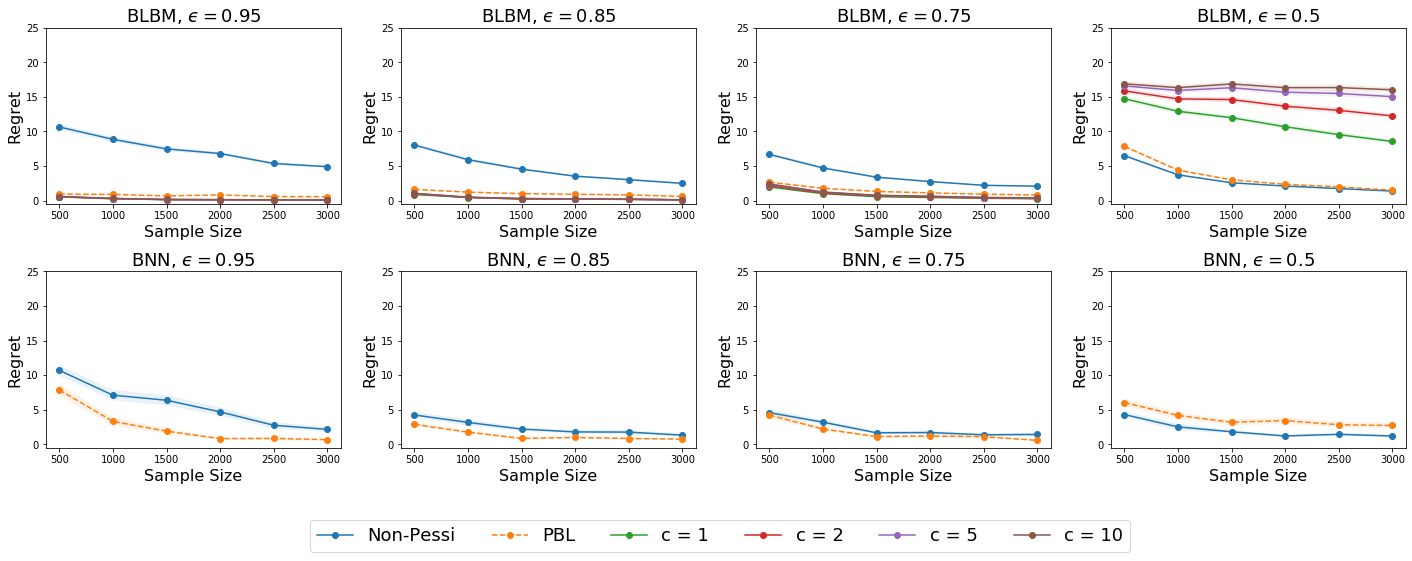

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


def sub_plot(ax1,file,bound=False): 
    info_ls = np.load(file,allow_pickle=True)
    y1 = [np.mean(t[0]) for t in info_ls]
    y2 = [np.mean(t[1]) for t in info_ls]
    y4 = [np.mean(t[3]) for t in info_ls]
    
    y1_lower = [np.mean(t[0]) - np.std(t[0])/np.sqrt(len(t[0])) for t in info_ls]
    y1_upper = [np.mean(t[0]) + np.std(t[0])/np.sqrt(len(t[0])) for t in info_ls]
    y4_lower = [np.mean(t[3]) - np.std(t[3])/np.sqrt(len(t[3])) for t in info_ls]
    y4_upper = [np.mean(t[3]) + np.std(t[3])/np.sqrt(len(t[3])) for t in info_ls]
    
    l1 = ax1.plot(x[0:len(y1)], y1,linestyle='-', marker="o", label='Non-Pessi')
    ax1.fill_between(x[0:len(y1)], y1_lower, y1_upper, alpha=.1)
    l4 = ax1.plot(x[0:len(y4)], y4,linestyle='--', marker="o", label='PBL')
    ax1.fill_between(x[0:len(y4)], y4_lower, y4_upper, alpha=.1)
    
    line_labels = ["Non-Pessi", "PBL"]

    l=[l1,l4]
    
    if bound == True:
        for k in range(len(c_ls)):
            if c_ls[k] in [1,2,5,10]:
                y5 = []
                for i in range(6):
                    y5.append(np.mean([info_ls[i][4][q][k] for q in range(50)]))

                y5_lower = []
                y5_upper = []
                for i in range(6):
                    series = [info_ls[i][4][q][k] for q in range(50)]
                    y5_lower.append(np.mean(series) - np.std(series)/np.sqrt(len(series)))
                    y5_upper.append(np.mean(series) + np.std(series)/np.sqrt(len(series))) 
                    
                l.append(ax1.plot(x[0:len(y5)], y5,linestyle='-', marker="o", label='Bound_'+str(c_ls[k])))
                ax1.fill_between(x[0:len(y5)], y5_lower, y5_upper, alpha=.1)
                line_labels.append('c = '+str(c_ls[k])) 
    
    ax1.set_xlabel('Sample Size', fontsize=16)
    ax1.set_ylabel('Regret', fontsize=16)
    
    return l, line_labels

# one stage (linear)
c_ls = [0,0.01,0.1,0.5,1,2,5,10]   
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,8))
x = np.array(["500","1000","1500","2000","2500","3000"])


l, line_labels = sub_plot(ax[0,0],"info_ls_blbm_linear_stage1_0.95.npy",True)
sub_plot(ax[1,0],"info_ls_bnn_linear_stage1_0.95.npy")

sub_plot(ax[0,1],"info_ls_blbm_linear_stage1_0.85.npy",True)
sub_plot(ax[1,1],"info_ls_bnn_linear_stage1_0.85.npy")

sub_plot(ax[0,2],"info_ls_blbm_linear_stage1_0.75.npy",True)
sub_plot(ax[1,2],"info_ls_bnn_linear_stage1_0.75.npy")

sub_plot(ax[0,3],"info_ls_blbm_linear_stage1_0.5.npy",True)
sub_plot(ax[1,3],"info_ls_bnn_linear_stage1_0.5.npy")

ax[0,0].set_title(r"BLBM, $ϵ = 0.95$", fontsize=18)
ax[1,0].set_title(r"BNN, $ϵ = 0.95$", fontsize=18)
ax[0,1].set_title(r"BLBM, $ϵ = 0.85$", fontsize=18)
ax[1,1].set_title(r"BNN, $ϵ = 0.85$", fontsize=18)
ax[0,2].set_title(r"BLBM, $ϵ = 0.75$", fontsize=18)
ax[1,2].set_title(r"BNN, $ϵ = 0.75$", fontsize=18)
ax[0,3].set_title(r"BLBM, $ϵ = 0.5$", fontsize=18)
ax[1,3].set_title(r"BNN, $ϵ = 0.5$", fontsize=18)
ax[0,0].set_ylim([-0.5,25])
ax[0,1].set_ylim([-0.5,25])
ax[0,2].set_ylim([-0.5,25])
ax[0,3].set_ylim([-0.5,25])
ax[1,0].set_ylim([-0.5,25])
ax[1,1].set_ylim([-0.5,25])
ax[1,2].set_ylim([-0.5,25])
ax[1,3].set_ylim([-0.5,25])

fig.legend(l,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="lower center",   # Position of legend
           borderaxespad=0.5,bbox_to_anchor=(0.5, 0), prop={'size':18},fancybox=True  # Title for the legend
           , ncol=7)

plt.tight_layout(pad=2)  
plt.subplots_adjust(bottom=0.2)
plt.show()
fig.savefig('../stage1_linear.png')

/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


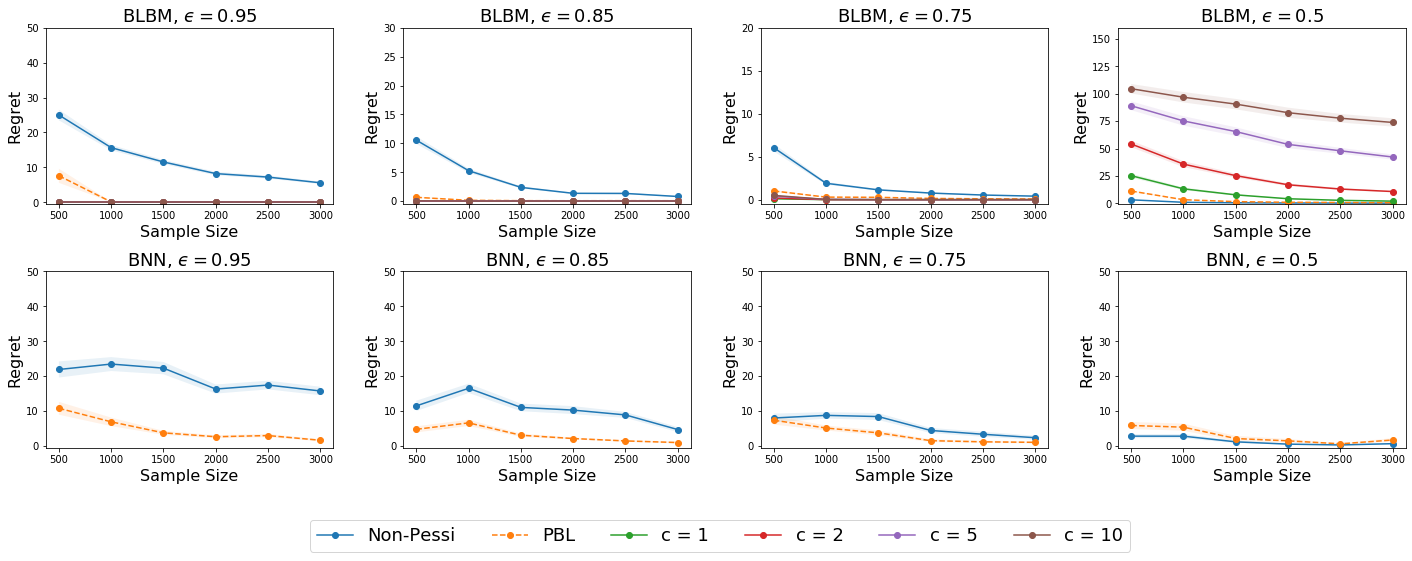

In [3]:
# one stage (nonlinear)

c_ls = [0,0.01,0.1,0.5,1,2,5,10]   
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,8))
x = np.array(["500","1000","1500","2000","2500","3000"])

l, line_labels = sub_plot(ax[0,0],"info_ls_blbm_nonlinear_stage1_0.95.npy",True)
sub_plot(ax[1,0],"info_ls_bnn_nonlinear_stage1_0.95.npy")

sub_plot(ax[0,1],"info_ls_blbm_nonlinear_stage1_0.85.npy",True)
sub_plot(ax[1,1],"info_ls_bnn_nonlinear_stage1_0.85.npy")

sub_plot(ax[0,2],"info_ls_blbm_nonlinear_stage1_0.75.npy",True)
sub_plot(ax[1,2],"info_ls_bnn_nonlinear_stage1_0.75.npy")

sub_plot(ax[0,3],"info_ls_blbm_nonlinear_stage1_0.5.npy",True)
sub_plot(ax[1,3],"info_ls_bnn_nonlinear_stage1_0.5.npy")

ax[0,0].set_title(r"BLBM, $ϵ = 0.95$", fontsize=18)
ax[1,0].set_title(r"BNN, $ϵ = 0.95$", fontsize=18)
ax[0,1].set_title(r"BLBM, $ϵ = 0.85$", fontsize=18)
ax[1,1].set_title(r"BNN, $ϵ = 0.85$", fontsize=18)
ax[0,2].set_title(r"BLBM, $ϵ = 0.75$", fontsize=18)
ax[1,2].set_title(r"BNN, $ϵ = 0.75$", fontsize=18)
ax[0,3].set_title(r"BLBM, $ϵ = 0.5$", fontsize=18)
ax[1,3].set_title(r"BNN, $ϵ = 0.5$", fontsize=18)
ax[0,0].set_ylim([-0.5,50])
ax[0,1].set_ylim([-0.5,30])
ax[0,2].set_ylim([-0.5,20])
ax[0,3].set_ylim([-0.5,160])
ax[1,0].set_ylim([-0.5,50])
ax[1,1].set_ylim([-0.5,50])
ax[1,2].set_ylim([-0.5,50])
ax[1,3].set_ylim([-0.5,50])

fig.legend(l,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="lower center",   # Position of legend
           borderaxespad=0.5,bbox_to_anchor=(0.5, 0), prop={'size':18},fancybox=True  # Title for the legend
           , ncol=7)

plt.tight_layout(pad=2)  
plt.subplots_adjust(bottom=0.2)
plt.show()
fig.savefig('../stage1_nonlinear.png')

In [4]:
def sub_plot(ax1,file,bound=False): 
    info_ls = np.load(file,allow_pickle=True)
    y1 = [np.mean(t[0]) for t in info_ls]
    y2 = [np.mean(t[1]) for t in info_ls]
    y4 = [np.mean(t[3]) for t in info_ls]

    y1_lower = [np.mean(t[0]) - np.std(t[0])/np.sqrt(len(t[0])) for t in info_ls]
    y1_upper = [np.mean(t[0]) + np.std(t[0])/np.sqrt(len(t[0])) for t in info_ls]
    y4_lower = [np.mean(t[3]) - np.std(t[3])/np.sqrt(len(t[3])) for t in info_ls]
    y4_upper = [np.mean(t[3]) + np.std(t[3])/np.sqrt(len(t[3])) for t in info_ls]
    
    if bound == True:
        y5 = []
        for i in range(6):
            y5.append(np.mean([info_ls[i][4][q][0] for q in range(len(info_ls[0][4]))]))
            
        y5_lower = []
        y5_upper = []
        for i in range(6): 
            series = [info_ls[i][4][q][0] for q in range(len(info_ls[0][4]))]
            y5_lower.append(np.mean(series) - np.std(series)/np.sqrt(len(series)))
            y5_upper.append(np.mean(series) + np.std(series)/np.sqrt(len(series))) 
            
        l1 = ax1.plot(x[0:len(y5)], y5,linestyle='-', marker="o", label='Non-Pessi')
        ax1.fill_between(x[0:len(y5)], y5_lower, y5_upper, alpha=.1)
        l4 = ax1.plot(x,-20*np.ones(6),linestyle='--', marker="o", label='PBL')
        ax1.fill_between(x, -20*np.ones(6),-20*np.ones(6), alpha=.1)
        line_labels = ["Non-Pessi", "PBL"]    
        l=[l1,l4]
    else:
        l1 = ax1.plot(x[0:len(y1)], y1,linestyle='-', marker="o", label='Non-Pessi')
        ax1.fill_between(x[0:len(y1)], y1_lower, y1_upper, alpha=.1)
        l4 = ax1.plot(x[0:len(y4)], y4,linestyle='--', marker="o", label='Uniform-Pessi')
        ax1.fill_between(x[0:len(y4)], y4_lower, y4_upper, alpha=.1)
        line_labels = ["Non-Pessi", "PBL"]    
        l=[l1,l4]

        
    if bound == True:
        for k in range(len(c_ls)):
            if c_ls[k] in [0.5,1,2,10]:
                y5 = []
                for i in range(6):
                    y5.append(np.mean([info_ls[i][4][q][k] for q in range(len(info_ls[i][4]))]))
                l.append(ax1.plot(x[0:len(y5)], y5,linestyle='-', marker="o", label='Bound_'+str(c_ls[k])))
                line_labels.append('c = '+str(c_ls[k]))
                
                y5_lower = []
                y5_upper = []
                for i in range(6):
                    series = [info_ls[i][4][q][k] for q in range(len(info_ls[i][4]))]
                    y5_lower.append(np.mean(series) - np.std(series)/np.sqrt(len(series)))
                    y5_upper.append(np.mean(series) + np.std(series)/np.sqrt(len(series))) 
            
                ax1.fill_between(x[0:len(y5)], y5_lower, y5_upper, alpha=.1)

    
    ax1.set_xlabel('Sample Size', fontsize=16)
    ax1.set_ylabel('Regret', fontsize=16)
    
    return l, line_labels

/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


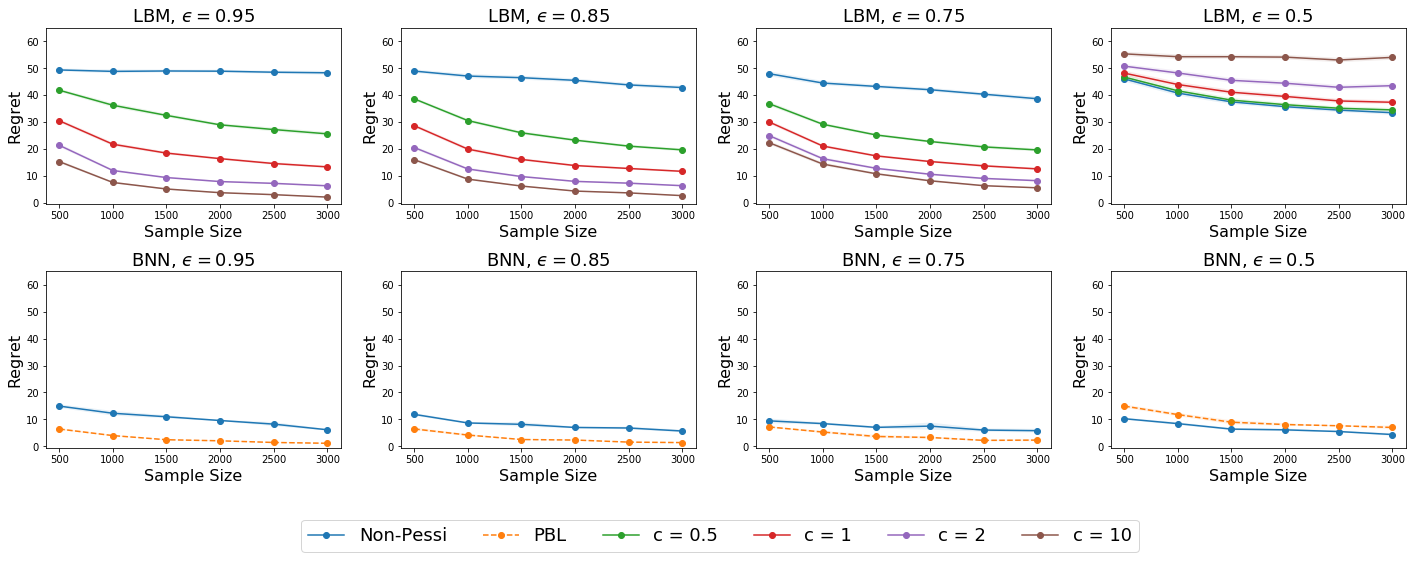

In [5]:
# two stages (linear)

c_ls = [0,0.01,0.1,0.5,1,2,5,10]   
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,8))
x = np.array(["500","1000","1500","2000","2500","3000"])

l, line_labels = sub_plot(ax[0,0],"info_ls_blbm_linear_stage2_0.95.npy",True)
sub_plot(ax[1,0],"info_ls_bnn_linear_stage2_0.95.npy")

sub_plot(ax[0,1],"info_ls_blbm_linear_stage2_0.85.npy",True)
sub_plot(ax[1,1],"info_ls_bnn_linear_stage2_0.85.npy")

sub_plot(ax[0,2],"info_ls_blbm_linear_stage2_0.75.npy",True)
sub_plot(ax[1,2],"info_ls_bnn_linear_stage2_0.75.npy")

sub_plot(ax[0,3],"info_ls_blbm_linear_stage2_0.5.npy",True)
sub_plot(ax[1,3],"info_ls_bnn_linear_stage2_0.5.npy")

ax[0,0].set_title(r"LBM, $ϵ = 0.95$", fontsize=18)
ax[1,0].set_title(r"BNN, $ϵ = 0.95$", fontsize=18)
ax[0,1].set_title(r"LBM, $ϵ = 0.85$", fontsize=18)
ax[1,1].set_title(r"BNN, $ϵ = 0.85$", fontsize=18)
ax[0,2].set_title(r"LBM, $ϵ = 0.75$", fontsize=18)
ax[1,2].set_title(r"BNN, $ϵ = 0.75$", fontsize=18)
ax[0,3].set_title(r"LBM, $ϵ = 0.5$", fontsize=18)
ax[1,3].set_title(r"BNN, $ϵ = 0.5$", fontsize=18)
ax[0,0].set_ylim([-0.5,65])
ax[0,1].set_ylim([-0.5,65])
ax[0,2].set_ylim([-0.5,65])
ax[0,3].set_ylim([-0.5,65])
ax[1,0].set_ylim([-0.5,65])
ax[1,1].set_ylim([-0.5,65])
ax[1,2].set_ylim([-0.5,65])
ax[1,3].set_ylim([-0.5,65])

fig.legend(l,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="lower center",   # Position of legend
           borderaxespad=0.5,bbox_to_anchor=(0.5, 0), prop={'size':18},fancybox=True  # Title for the legend
           , ncol=7)

plt.tight_layout(pad=2)  
plt.subplots_adjust(bottom=0.2)
plt.show()
fig.savefig('../stage2_linear.png')

/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


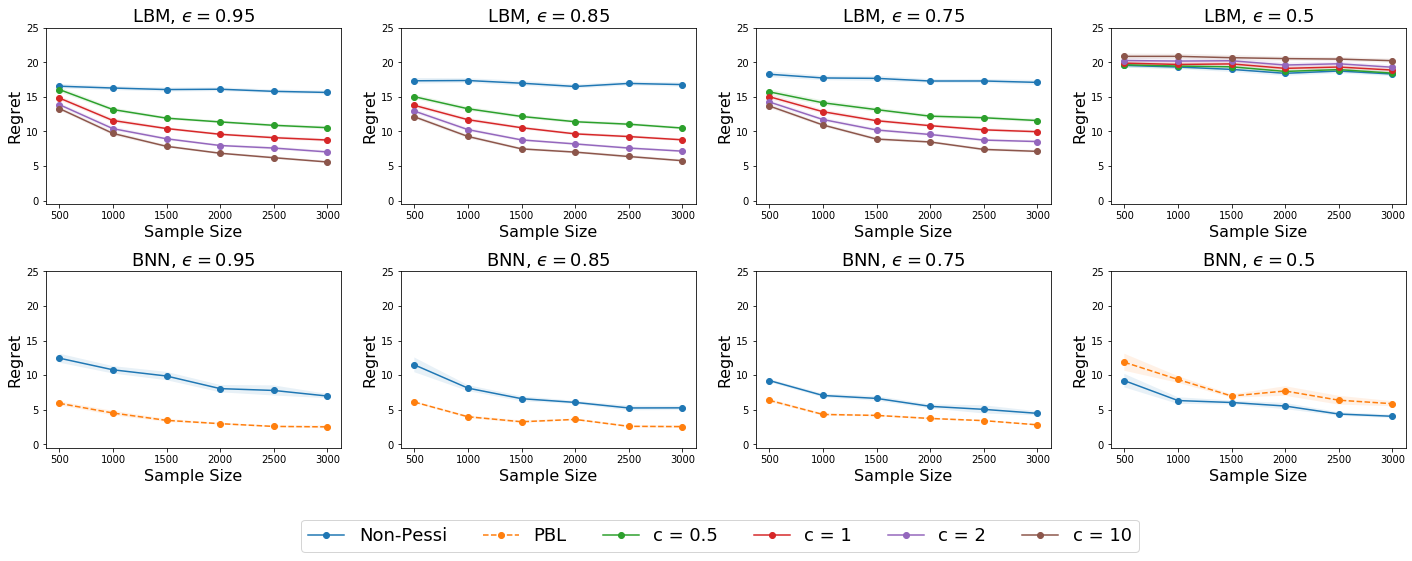

In [6]:
# two stages (nonlinear)

c_ls = [0,0.01,0.1,0.5,1,2,5,10]   
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,8))
x = np.array(["500","1000","1500","2000","2500","3000"])

l, line_labels = sub_plot(ax[0,0],"info_ls_blbm_nonlinear_stage2_0.95.npy",True)
sub_plot(ax[1,0],"info_ls_bnn_nonlinear_stage2_0.95.npy")

sub_plot(ax[0,1],"info_ls_blbm_nonlinear_stage2_0.85.npy",True)
sub_plot(ax[1,1],"info_ls_bnn_nonlinear_stage2_0.85.npy")

sub_plot(ax[0,2],"info_ls_blbm_nonlinear_stage2_0.75.npy",True)
sub_plot(ax[1,2],"info_ls_bnn_nonlinear_stage2_0.75.npy")

sub_plot(ax[0,3],"info_ls_blbm_nonlinear_stage2_0.5.npy",True)
sub_plot(ax[1,3],"info_ls_bnn_nonlinear_stage2_0.5.npy")

ax[0,0].set_title(r"LBM, $ϵ = 0.95$", fontsize=18)
ax[1,0].set_title(r"BNN, $ϵ = 0.95$", fontsize=18)
ax[0,1].set_title(r"LBM, $ϵ = 0.85$", fontsize=18)
ax[1,1].set_title(r"BNN, $ϵ = 0.85$", fontsize=18)
ax[0,2].set_title(r"LBM, $ϵ = 0.75$", fontsize=18)
ax[1,2].set_title(r"BNN, $ϵ = 0.75$", fontsize=18)
ax[0,3].set_title(r"LBM, $ϵ = 0.5$", fontsize=18)
ax[1,3].set_title(r"BNN, $ϵ = 0.5$", fontsize=18)
ax[0,0].set_ylim([-0.5,25])
ax[0,1].set_ylim([-0.5,25])
ax[0,2].set_ylim([-0.5,25])
ax[0,3].set_ylim([-0.5,25])
ax[1,0].set_ylim([-0.5,25])
ax[1,1].set_ylim([-0.5,25])
ax[1,2].set_ylim([-0.5,25])
ax[1,3].set_ylim([-0.5,25])

fig.legend(l,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="lower center",   # Position of legend
           borderaxespad=0.5,bbox_to_anchor=(0.5, 0), prop={'size':18},fancybox=True  # Title for the legend
           , ncol=7)

plt.tight_layout(pad=2)  
plt.subplots_adjust(bottom=0.2)
plt.show()
fig.savefig('../stage2_nonlinear.png')